In [1]:
import numpy as np

In [2]:
a = np.random.randint(0, 100, size=100)

In [3]:
a

array([28, 85, 23, 55, 67, 94, 90, 85, 99, 30, 21, 12, 31, 70, 67, 22, 53,
       13, 67, 60, 14, 95, 67, 17, 27, 80, 38, 39, 26, 85, 58, 92, 84, 70,
       13, 52, 93,  7, 25, 37, 58, 38, 87, 31, 49,  4, 14, 23, 51, 35, 48,
       37, 76, 46, 80, 42, 14, 35, 56, 91, 32, 87,  5, 34, 37, 78, 66, 95,
       66, 95, 48, 25, 17,  8, 69, 83, 84,  0, 49, 20, 87,  9, 76, 62, 17,
        3, 29,  0, 38,  3, 14, 14, 16, 88, 62, 64, 55, 33, 54, 32])

In [4]:
b = np.random.choice(a, size=20)

In [5]:
b

array([31,  9, 31, 70, 17, 37, 31, 12, 37, 21, 87, 54, 92,  0, 66,  0, 14,
       64, 60, 95])

In [6]:
b.mean()

41.4

In [7]:
b.std()

29.51169259801952

In [9]:
import math
sem = b.std() / math.sqrt(len(b))

In [10]:
sem

6.599015078024902

In [11]:
z_score = 1.96  # For 95% confidence, the Z-score is approximately 1.96

# Step 5: Calculate the margin of error
margin_of_error = z_score * sem

# Step 6: Calculate the confidence interval
ci_lower = b.mean() - margin_of_error
ci_upper = b.mean() + margin_of_error

In [12]:
ci_upper

54.33406955292881

In [13]:
ci_lower

28.46593044707119

In [14]:
print(f"Sample Mean: {b.mean():.2f}")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

Sample Mean: 41.40
95% Confidence Interval: [28.47, 54.33]


In [15]:
# Now if get the mean of a, it should be between [28.47, 54.33]

In [16]:
a.mean()

47.6

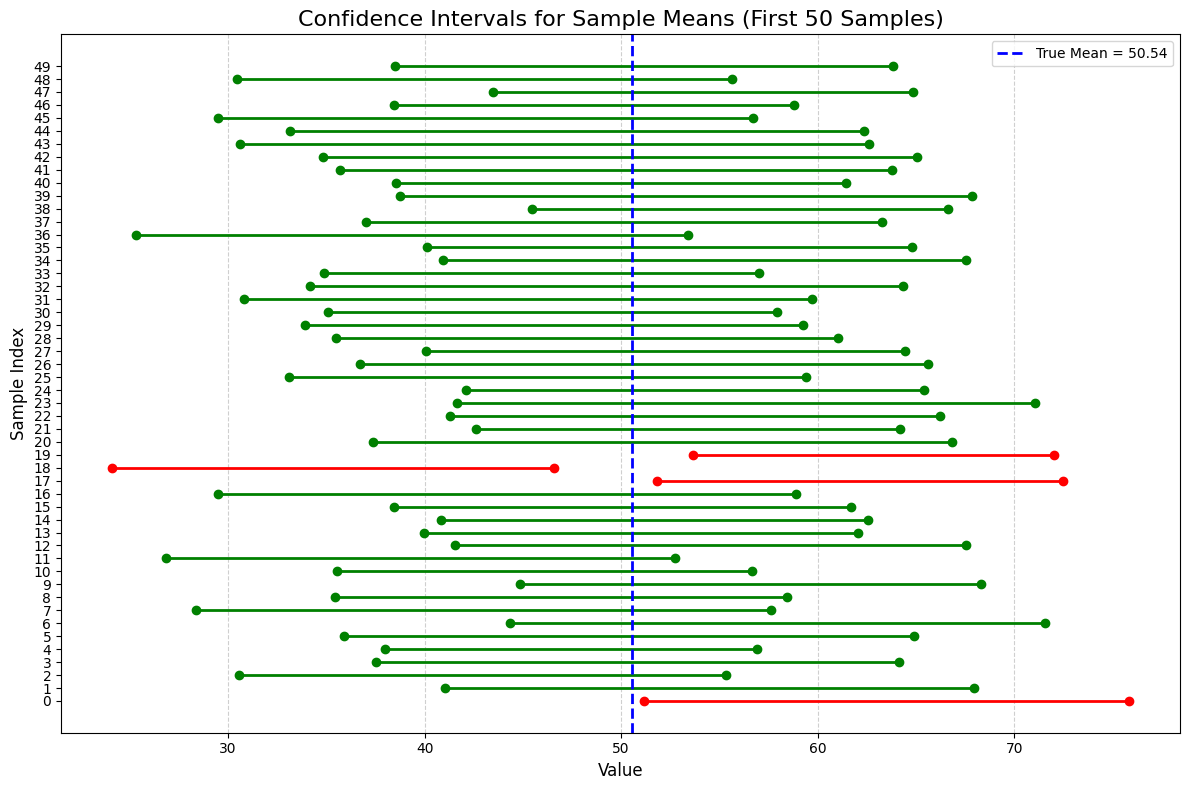

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Create population
np.random.seed(42)  # For reproducibility
a = np.random.randint(0, 100, size=100)
true_mean = a.mean()

ci_bounds = []
contains_mean_flags = []

# Generate CIs
for _ in range(50):  # Visualizing first 50
    b = np.random.choice(a, size=20)
    sample_mean = b.mean()
    sem = b.std(ddof=1) / math.sqrt(len(b))
    margin_of_error = 1.96 * sem
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    ci_bounds.append((ci_lower, ci_upper))
    contains_mean_flags.append(ci_lower <= true_mean <= ci_upper)

# Plot
plt.figure(figsize=(12, 8))
for i, ((low, high), contains) in enumerate(zip(ci_bounds, contains_mean_flags)):
    color = 'green' if contains else 'red'
    plt.hlines(y=i, xmin=low, xmax=high, color=color, linewidth=2)
    plt.plot((low, high), (i, i), 'o', color=color)  # Endpoints

# True mean line
plt.axvline(x=true_mean, color='blue', linestyle='--', linewidth=2, label=f'True Mean = {true_mean:.2f}')

# Labels and aesthetics
plt.title('Confidence Intervals for Sample Means (First 50 Samples)', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Sample Index', fontsize=12)
plt.yticks(range(50))
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

✅ Green intervals are the ~95% that contain the true mean.

❌ Red intervals are the ~5% that miss the true mean — these are expected errors due to random sampling.